<b><em>Authors:</em></b><br>
Eduardo Paz<br>
Asmaa Abdul-Amin<br>
Parker Link<br>
Ahmed Sachit <br>
Alhassane Moulaye<br>


<h1 style="text-align: center;font-size: 31pt;">CMSC206: Data Analysis Project</h1>

In this section, I will import the necessary libraries to download and analyze stock price data for aerospace and defense stocks. I have prefiltered the dataset to focus on financially strong stocks with positive momentum and liquidity. This was done by selecting stocks trading above their 20-day Simple Moving Average (SMA). The Aerospace and Defense Industry capitalizes on government contracts and defense spending.

In our analysis we can check for rising volume which indicates growing investor interest. To further develop this project we can also integrate Feature Engineering, Statistical analysis, and  machine learning models to predict future stock prices.


If you guys are interested, I have a working model that utilizes quantum computing techniques to generate an optimal portfolio of five stocks based on a similar data extraction. Then it comapres he quantum generated model to a classicaly generated model... let me know what you guys think or like what direction you all would like to see this project go in. Im open to any suggestions or ideas you may have.


Below is the full list of aerospace and defense stocks used in this analysis:<br>
Dataset 1: https://drive.google.com/file/d/1AmsQ95PffFlcoCkINd8iCxmLYdT1yIQJ/view?usp=sharing<br>
dataset 2: https://drive.google.com/file/d/1_09iFs0UXSXsCOPHFC1H67xQpjdpc1TL/view?usp=sharing

In [97]:
!pip install pandas numpy matplotlib yfinance PyPortfolioOpt
import re
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use("dark_background")

In [98]:
# Define the expected file path
file_name = "https://drive.google.com/uc?export=download&id=1Kyky0DRWqLz3JCrPip2r9rzwBYMCozrK"
#file_name = "https://drive.google.com/uc?export=download&id=1AmsQ95PffFlcoCkINd8iCxmLYdT1yIQJ"
# Load stock symbols from Google Sheets
df = pd.read_csv(file_name)

# Ensure 'Symbol' column exists
if 'Symbol' not in df.columns:
    raise ValueError("CSV file must contain a 'Symbol' column.")

# Extract symbols
symbols = df["Symbol"].dropna().tolist()
symbols

['RYCEY',
 'HON',
 'RTX',
 'ATRO',
 'TXT',
 'GD',
 'SAABY',
 'FINMY',
 'MHVIY',
 'LHX',
 'LMT',
 'BAESF',
 'RNMBY',
 'THLLY',
 'LDOS',
 'ESLT',
 'TDG',
 'NOC',
 'HII',
 'HAGHY',
 'MHVYF',
 'MTUAY']

In [99]:
tickers = symbols
# Filter tickers that do NOT have special characters
filtered_tickers = [ticker for ticker in symbols if re.match(r'^[A-Z0-9]+$', ticker)]
tickers = filtered_tickers

In [100]:
ohlc = yf.download(tickers, period="max").loc["1990":]

[*********************100%***********************]  22 of 22 completed


In [101]:
prices = ohlc["Close"].dropna(how="all")
prices.tail() # prints the last 5 rows

Ticker,ATRO,BAESF,ESLT,FINMY,GD,HAGHY,HII,HON,LDOS,LHX,...,MHVYF,MTUAY,NOC,RNMBY,RTX,RYCEY,SAABY,TDG,THLLY,TXT
Date,,,,,,,,,,,,,,,,,,,,,
2025-03-06,24.500000,21.190001,353.760010,24.980000,264.549988,39.360001,193.929993,211.259995,133.059998,212.624390,...,16.76,187.339996,475.200012,258.709991,128.279999,10.51,18.750000,1344.680054,54.209999,73.370003
2025-03-07,24.450001,20.250000,357.029999,23.350000,271.559998,34.599998,195.970001,214.520004,139.240005,218.899994,...,17.00,179.000000,486.519989,241.389999,128.399994,10.74,18.020000,1341.589966,51.439999,75.419998
2025-03-10,24.030001,20.250000,347.850006,23.450001,271.940002,33.270000,197.029999,213.820007,137.380005,217.850006,...,15.66,163.960007,495.450012,242.475006,128.520004,9.81,18.209999,1336.050049,51.139999,75.440002
2025-03-11,24.590000,20.059999,352.769989,23.900000,264.119995,36.200001,195.009995,208.589996,134.110001,212.330002,...,15.47,175.399994,494.109985,254.160004,128.110001,9.90,19.280001,1319.869995,51.653999,73.650002
2025-03-12,24.740000,20.850000,350.890015,23.750000,260.760010,37.389999,190.994995,206.789993,133.970001,208.520004,...,NaN,181.179993,476.454987,275.989990,127.455002,10.35,19.280001,1328.677490,51.910000,73.095001


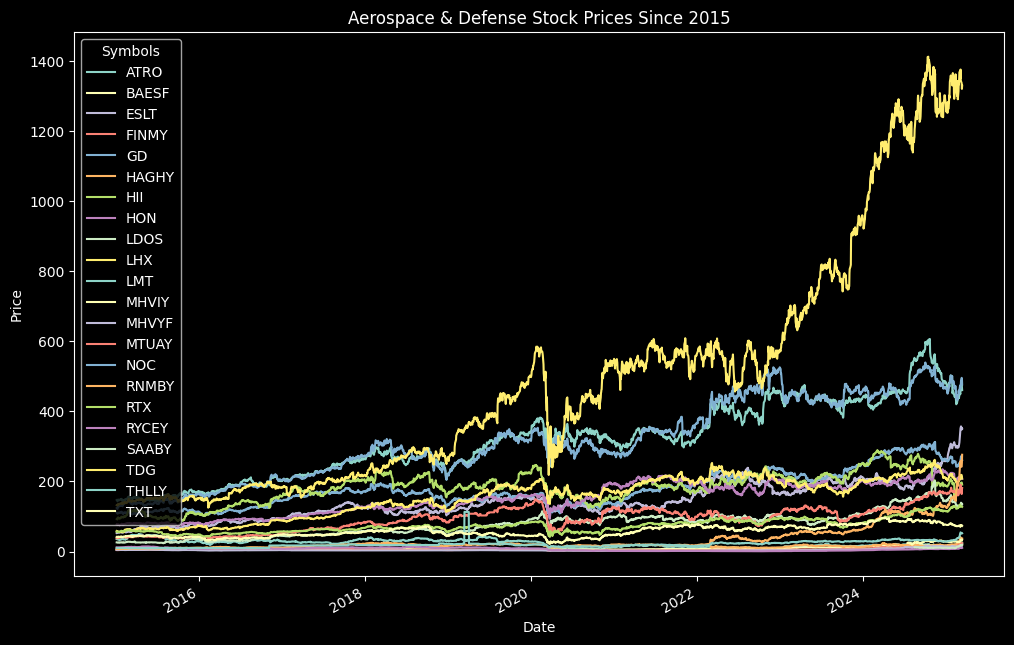

In [103]:
# Plot the stock close prices since 2015
prices[prices.index >= "2015-01-01"].plot(figsize=(12,8))

plt.title("Aerospace & Defense Stock Prices Since 2015")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(title="Symbols")

Stocks with expected returns > 0:
Ticker
AIR      0.041760
ATRO     0.185967
ESLT     0.140551
GD       0.151009
GE       0.084298
HEI      0.216097
NOC      0.151572
RTX      0.125613
RYCEY    0.042317
TGI      0.025837
dtype: float64


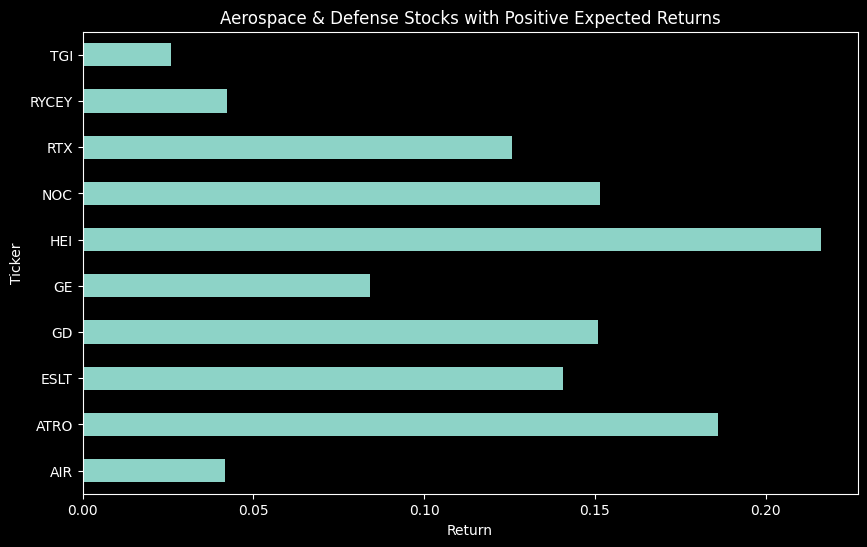

In [104]:
from pypfopt import expected_returns

# Calculate expected returns (mean historical, but CAPM works similarly)
mu_mean = expected_returns.mean_historical_return(prices_cleaned)

# Filter stocks with expected return > 0
positive_returns = mu_mean[mu_mean > 0]

# Display filtered tickers
print("Stocks with expected returns > 0:")
print(positive_returns)

# Optional: Plot them
import matplotlib.pyplot as plt

positive_returns.plot.barh(figsize=(10, 6))
plt.title("Aerospace & Defense Stocks with Positive Expected Returns")
plt.xlabel("Return")
plt.ylabel("Ticker")
plt.show()
